In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### About the data set
ABSTRACT: In this study, machine vision system was developed in order to distinguish between two different variety of raisins (Kecimen and Besni) grown in Turkey. Firstly, a total of 900 pieces raisin grains were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, minimum, mean, maximum and standard deviation statistical information was calculated for each feature. The distributions of both raisin varieties on the features were examined and these distributions were shown on the graphs. Later, models were created using LR, MLP, and SVM machine learning techniques and performance measurements were performed. The classification achieved 85.22% with LR, 86.33% with MLP and 86.44% with the highest classification accuracy obtained in the study with SVM. Considering the number of data available, it is possible to say that the study was successful.

Machine learning algorithm written in Python to distinguish between two raisin types (Kecimen, Besni).
Data set containts 900 rows, 450 rows of each class.
Classification problem solved by Support-vector machine (SVM) algorithm.

### Basic libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [11]:
dataset=pd.read_excel(r"C:\Users\sari3003\Data science\test\Raisin_Dataset.xlsx")

In [12]:
dataset.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen

In [13]:
dataset.shape

(900, 8)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [15]:
dataset.describe()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.509000  
75%    108375.750000    0.734991  1308.389750  
max    278217.000000    0.835455  2697.753000

### Converting class values to 0 and 1 and making sure every column is numerical.

In [16]:
dataset['Class'] = dataset['Class'].str.replace('Kecimen', '0')
dataset['Class'] = dataset['Class'].str.replace('Besni', '1')

cols = dataset.columns
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')

In [17]:
data_copy = dataset.copy()
y_data = data_copy.pop('Class').to_numpy()
X_data = data_copy.to_numpy()

#### Need to check if values are distributed evenly.

In [18]:
dataset['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

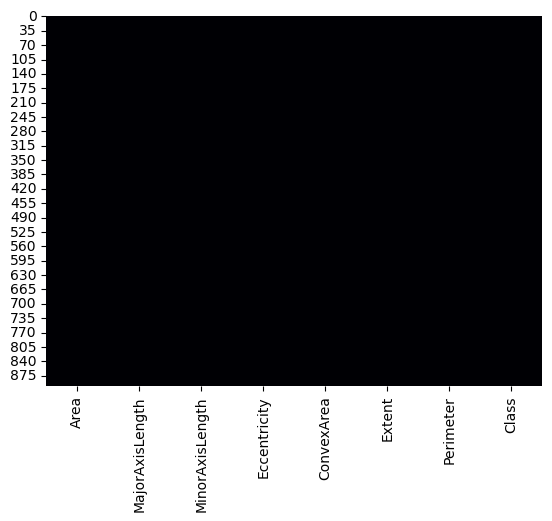

In [19]:
sns.heatmap(dataset.isnull(),cmap = 'magma',cbar = False);

### Data Visualization

####  Area:

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


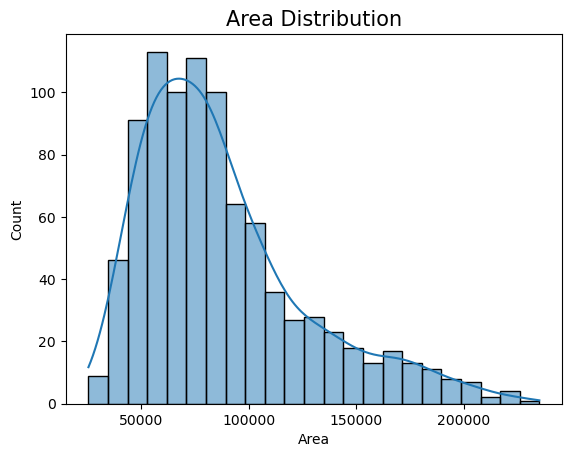

In [20]:
sns.histplot(data=dataset, x='Area', kde=True)
plt.title('Area Distribution',fontsize=15)
plt.show()

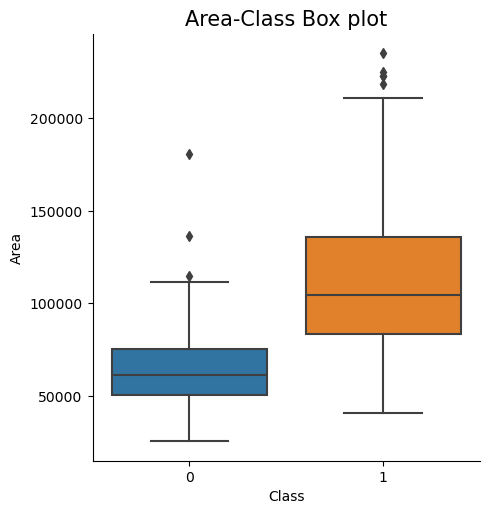

In [21]:
sns.catplot(data=dataset, x='Class', y='Area', kind='box')
plt.title("Area-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


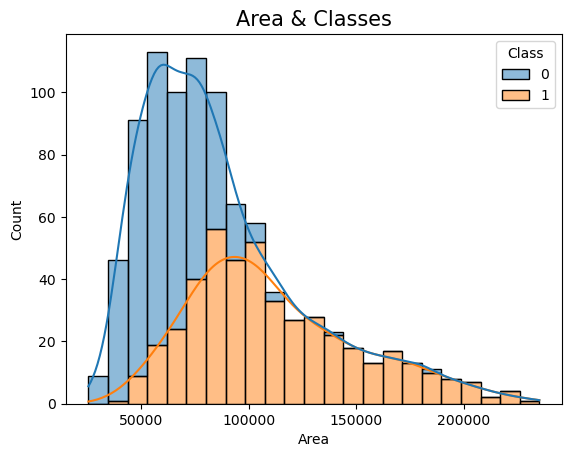

In [22]:
sns.histplot(data=dataset,x='Area',hue='Class',kde=True,multiple='stack')
plt.title('Area & Classes',fontsize=15)
plt.show()

---
$MajorAxisLength :$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


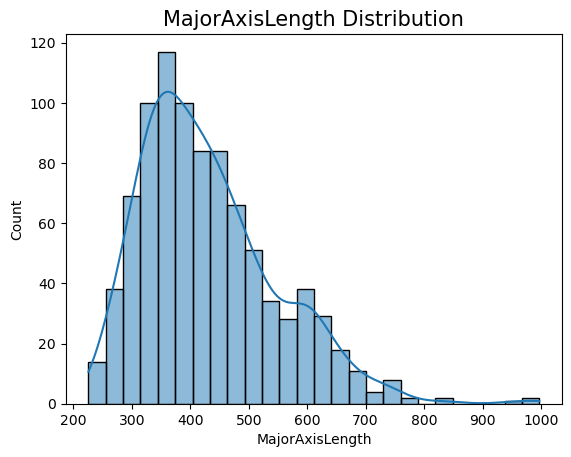

In [23]:
sns.histplot(
    data=dataset,
    x='MajorAxisLength',
    kde=True
)
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

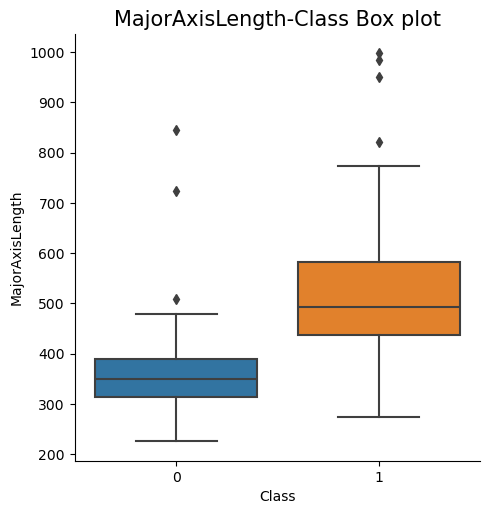

In [24]:
sns.catplot(
    data=dataset,
    x='Class',
    y='MajorAxisLength',
    kind='box',
)
plt.title("MajorAxisLength-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


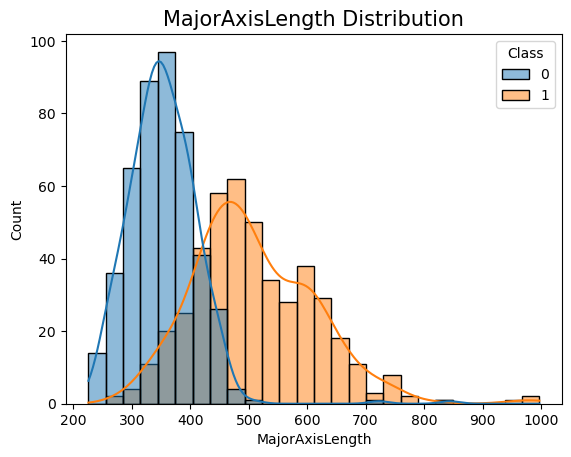

In [25]:
sns.histplot(
    data=dataset,
    x='MajorAxisLength',
    hue='Class',
    kde=True,
    multiple='layer'
)
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

---
$MinorAxisLength :$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


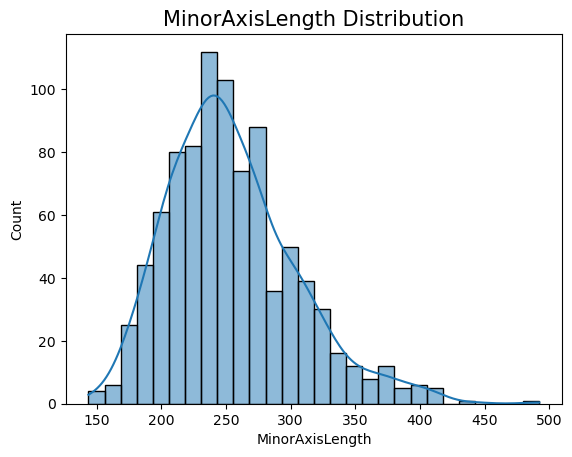

In [26]:
sns.histplot(
    data=dataset,
    x='MinorAxisLength',
    kde=True
)
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

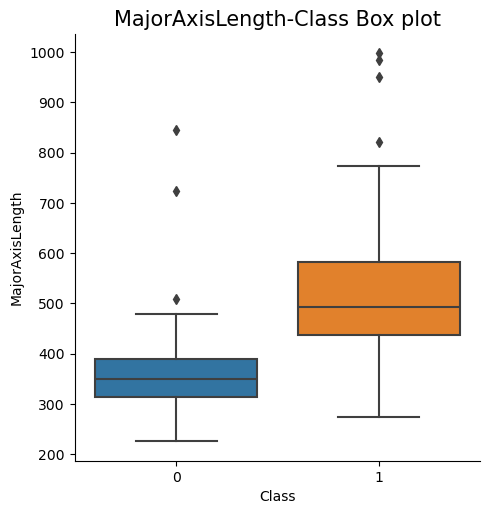

In [27]:
sns.catplot(
    data=dataset,
    x='Class',
    y='MajorAxisLength',
    kind='box',
)
plt.title("MajorAxisLength-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


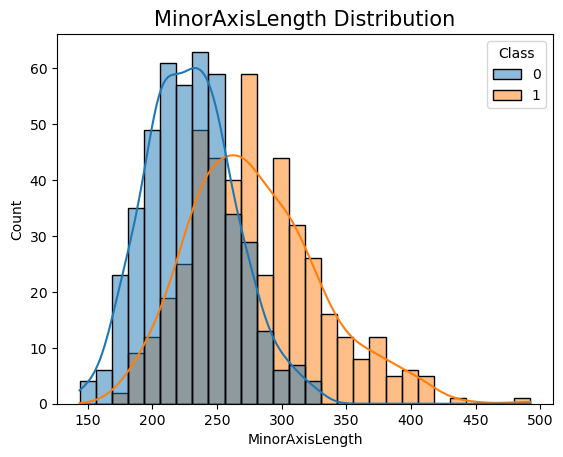

In [28]:
sns.histplot(
    data=dataset,
    x='MinorAxisLength',
    hue='Class',
    kde=True,
    multiple='layer'
)
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

---
$Eccentricity :$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


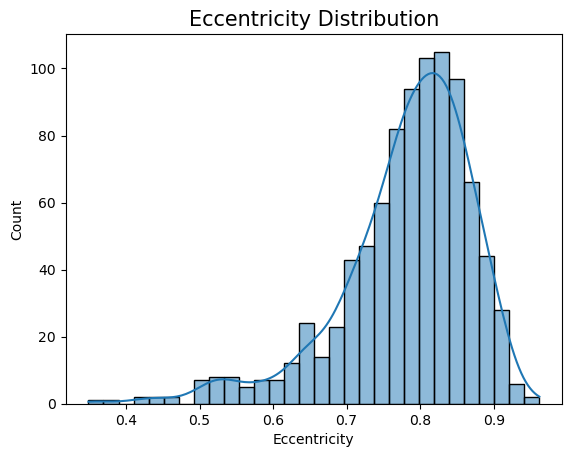

In [29]:
sns.histplot(
    data=dataset,
    x='Eccentricity',
    kde=True
)
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

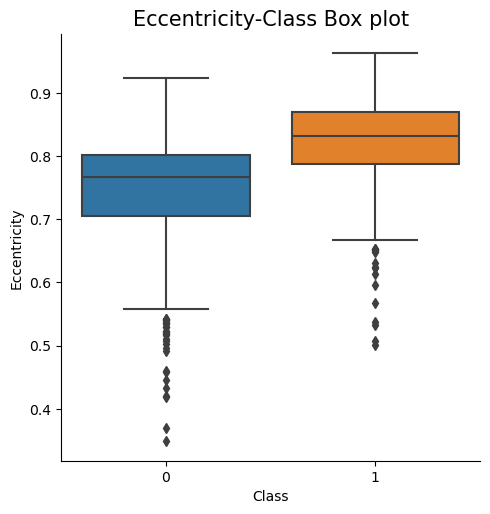

In [30]:
sns.catplot(
    data=dataset,
    x='Class',
    y='Eccentricity',
    kind='box',
)
plt.title("Eccentricity-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


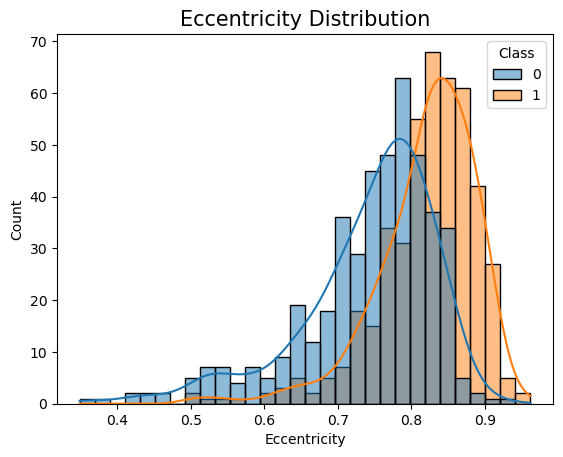

In [31]:
sns.histplot(
    data=dataset,
    x='Eccentricity',
    hue='Class',
    kde=True,
    multiple='layer'
)
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

---
$Convex Area :$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


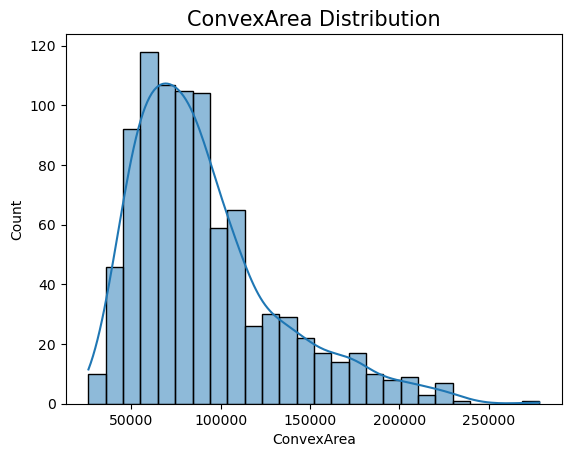

In [32]:
sns.histplot(
    data=dataset,
    x='ConvexArea',
    kde=True
)
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

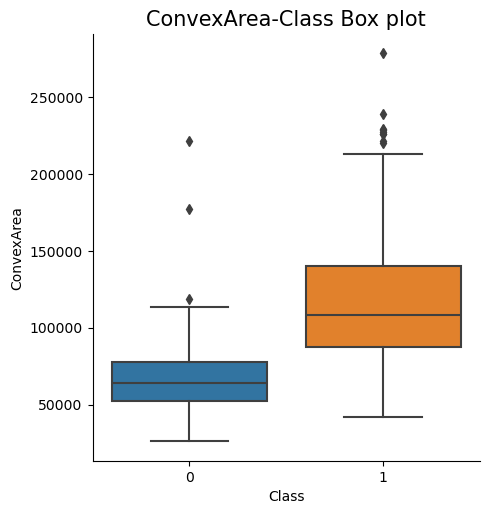

In [33]:
sns.catplot(
    data=dataset,
    x='Class',
    y='ConvexArea',
    kind='box',
)
plt.title("ConvexArea-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


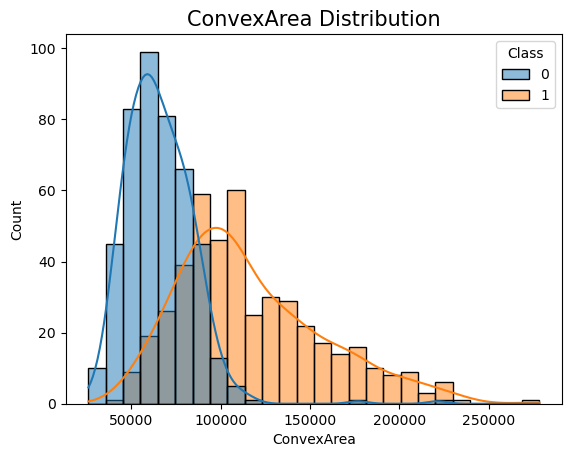

In [34]:
sns.histplot(
    data=dataset,
    x='ConvexArea',
    hue='Class',
    kde=True,
    multiple='layer'
)
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

---
$Extent :$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


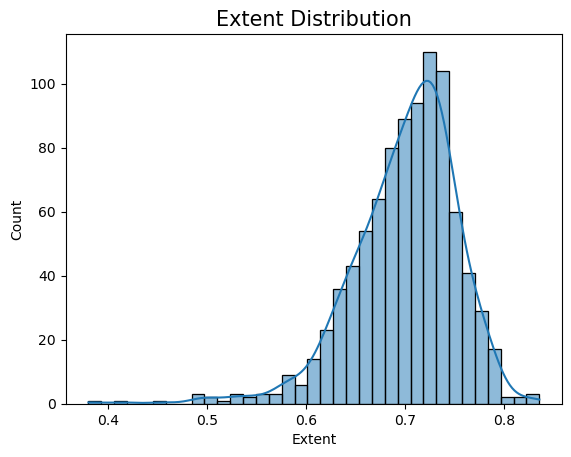

In [35]:
sns.histplot(
    data=dataset,
    x='Extent',
    kde=True
)
plt.title('Extent Distribution',fontsize=15)
plt.show()

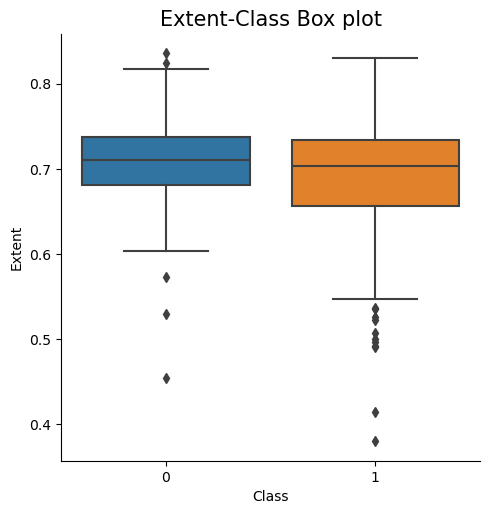

In [36]:
sns.catplot(
    data=dataset,
    x='Class',
    y='Extent',
    kind='box',
)
plt.title("Extent-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


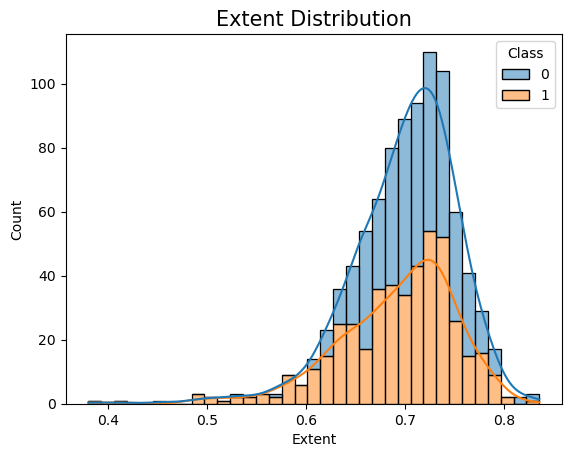

In [37]:
sns.histplot(
    data=dataset,
    x='Extent',
    hue='Class',
    kde=True,
    multiple='stack'
)
plt.title('Extent Distribution',fontsize=15)
plt.show()

---
$Perimeter:$

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


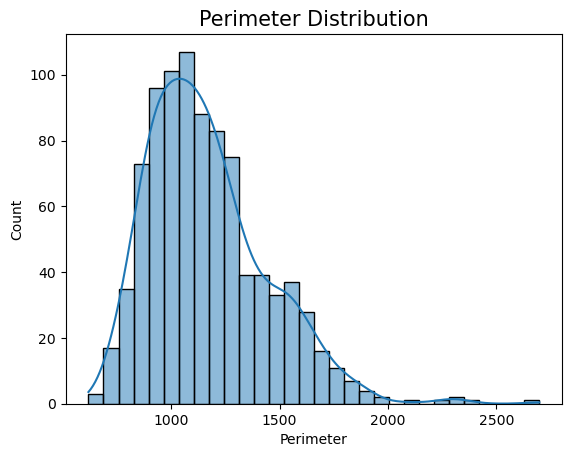

In [38]:
sns.histplot(
    data=dataset,
    x='Perimeter',
    kde=True
)
plt.title('Perimeter Distribution',fontsize=15)
plt.show()

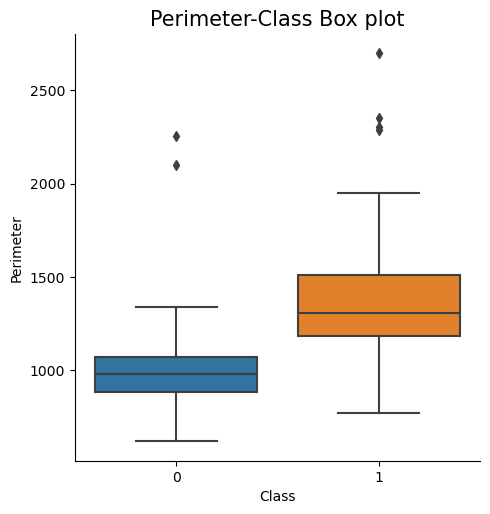

In [39]:
sns.catplot(
    data=dataset,
    x='Class',
    y='Perimeter',
    kind='box',
)
plt.title("Perimeter-Class Box plot",fontsize=15)
plt.show()

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


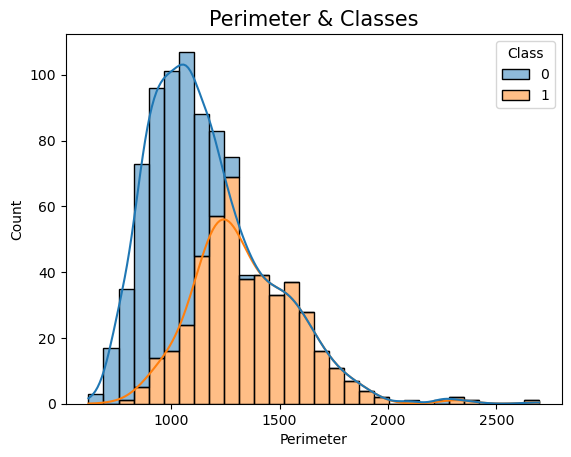

In [40]:
sns.histplot(
    data=dataset,
    x='Perimeter',
    hue='Class',
    kde=True,
    multiple='stack'
)
plt.title('Perimeter & Classes',fontsize=15)
plt.show()

Leaving few features all other features have a linear relationship with the class and are sperable to a greak extent.

In order to plot more complex plots, first let's see the correlation among features.

---
$Correlation$ $:$

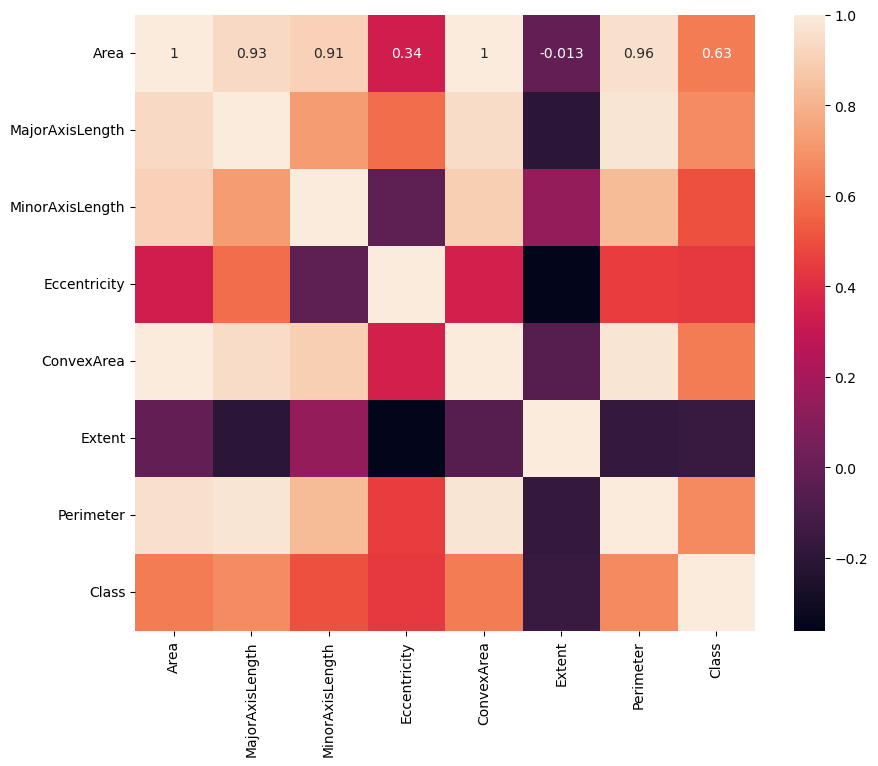

In [41]:
Corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr, annot=True)
plt.show()

There are many strong positive relations let's understand them one by one.

**Area vs Perimeter** $(0.96)$

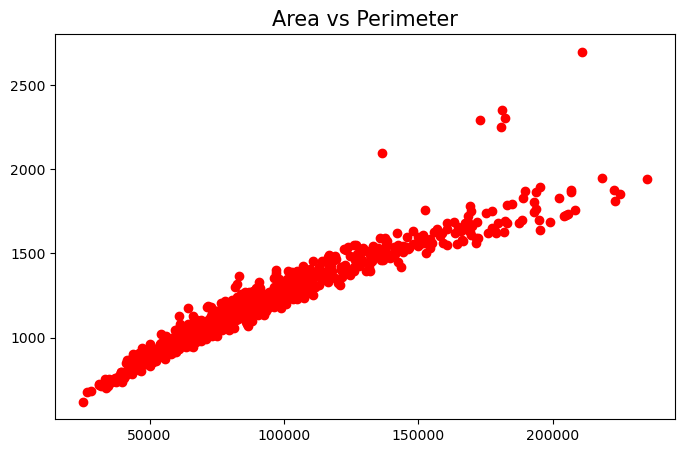

In [42]:
plt.figure(figsize=(8,5))
plt.title("Area vs Perimeter",fontsize=15)
plt.scatter(dataset.Area, dataset.Perimeter,color='r')
plt.show()

This confirms the strong `Linear Relationship`.

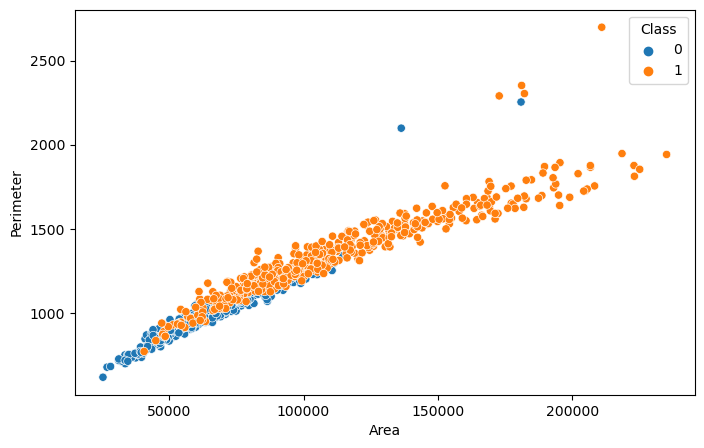

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='Area',
    y='Perimeter',
    hue='Class',
)
plt.show()

The classses are also sperable (a little), higher the `Area and Perimeter values` the class is `more likely` to be 
`Besin`. This confirms the `Box Plot and Histogram(+Density) Plot` relation we observed in the starting.

**Area vs ConvexAre** $(1.0)$

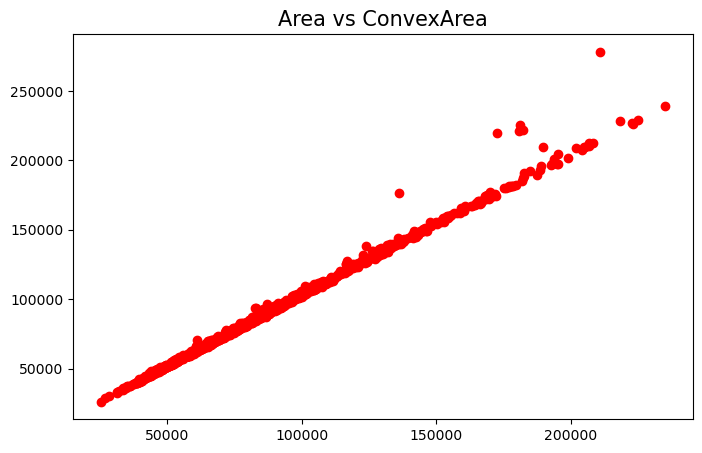

In [44]:
plt.figure(figsize=(8,5))
plt.title("Area vs ConvexArea",fontsize=15)
plt.scatter(dataset.Area, dataset.ConvexArea,color='r')
plt.show()

This is clearly `Completely Linear`. That's why the Correlation have $1$ Value.

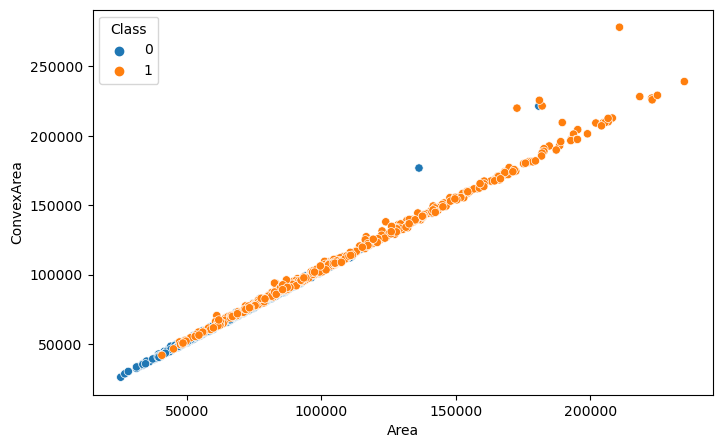

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='Area',
    y='ConvexArea',
    hue='Class',
)
plt.show()

Again simillar results this was `predictable` if you see the `Box Plot`.

**Area vs Axis** $(0.91-0.93)$

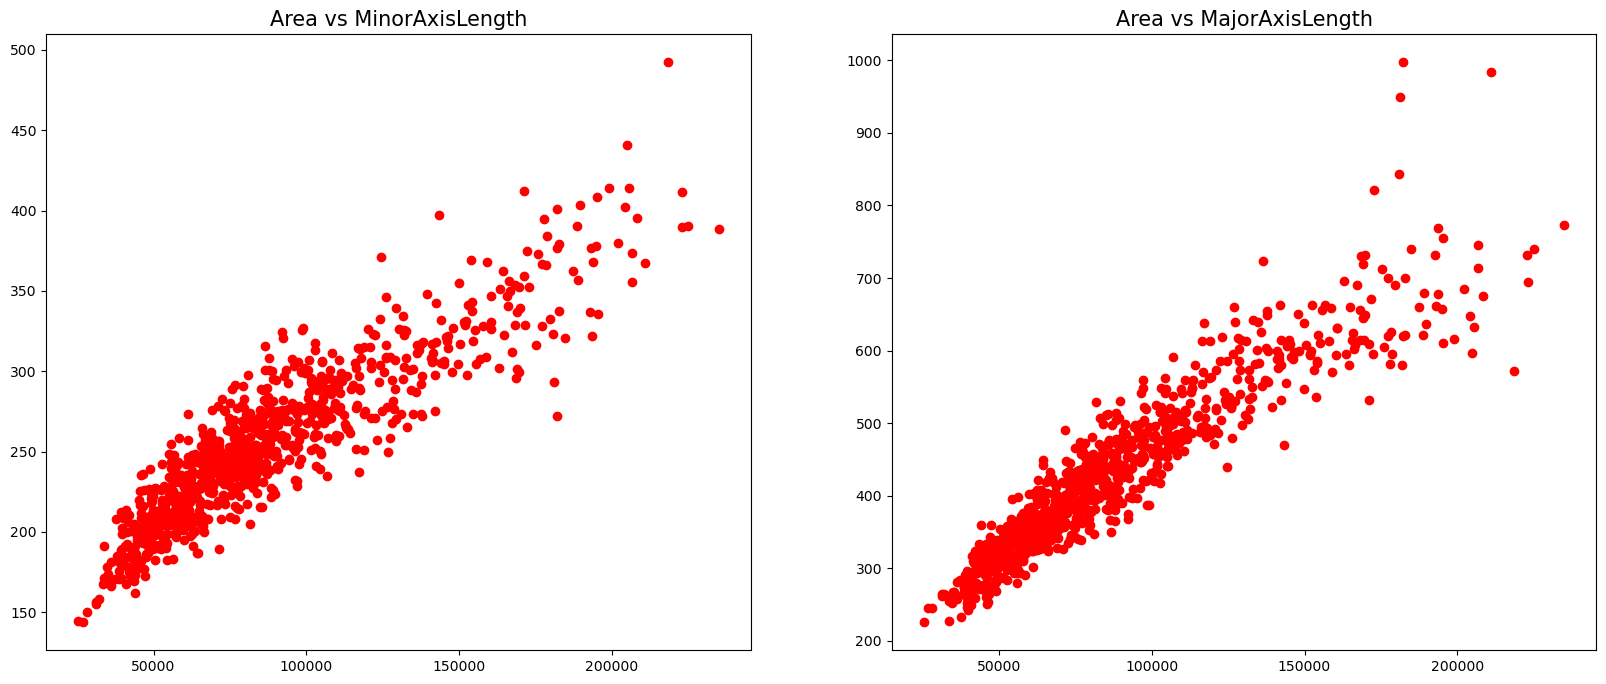

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Area vs MinorAxisLength",fontsize=15)
plt.scatter(dataset.Area, dataset.MinorAxisLength,color='r')


plt.subplot(1,2,2)
plt.title("Area vs MajorAxisLength",fontsize=15)
plt.scatter(dataset.Area, dataset.MajorAxisLength,color='r')
plt.show()

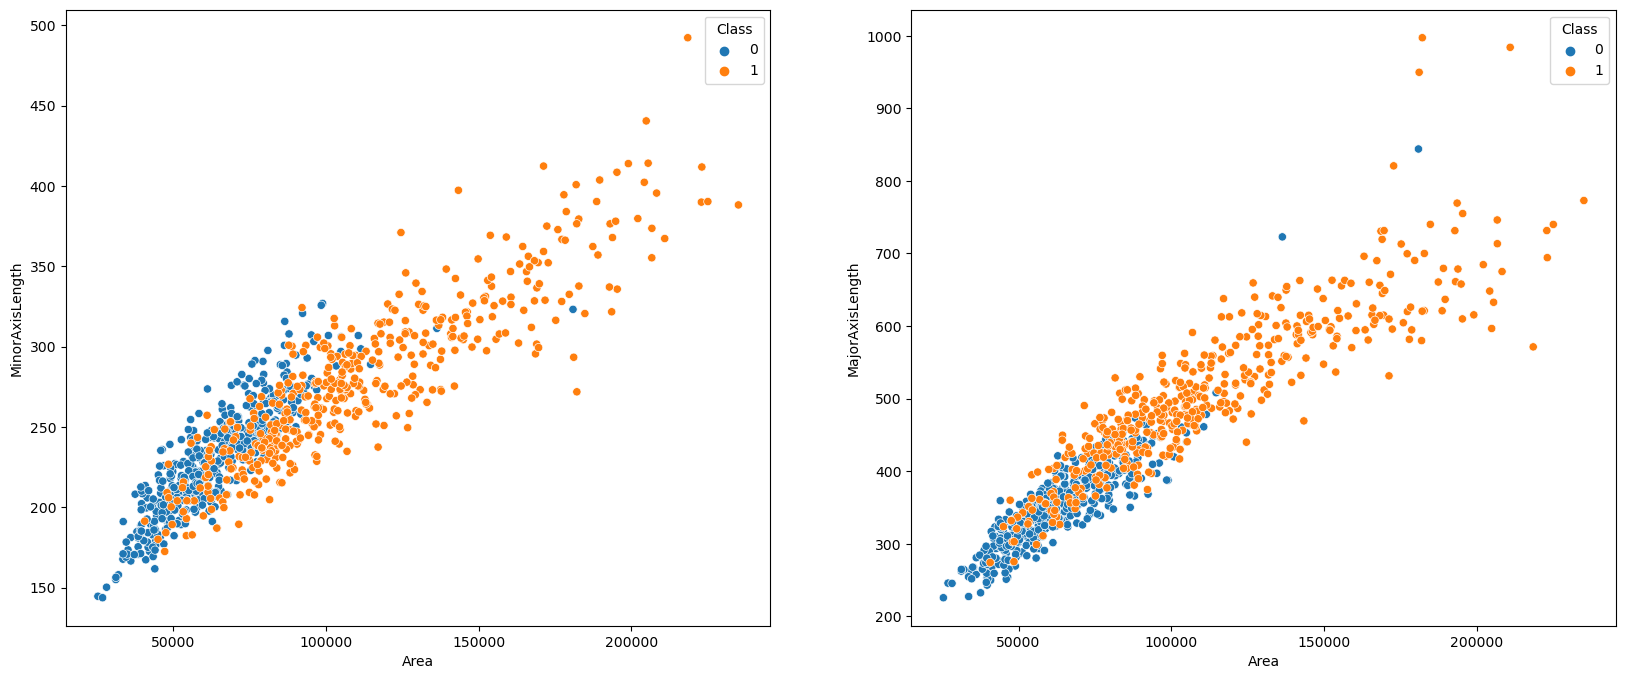

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(
    data=dataset,
    x='Area',
    y='MinorAxisLength',
    hue='Class',
)

plt.subplot(1,2,2)
sns.scatterplot(
    data=dataset,
    x='Area',
    y='MajorAxisLength',
    hue='Class',
)
plt.show()

**MajorAxis vs Perimeter** $(0.98)$

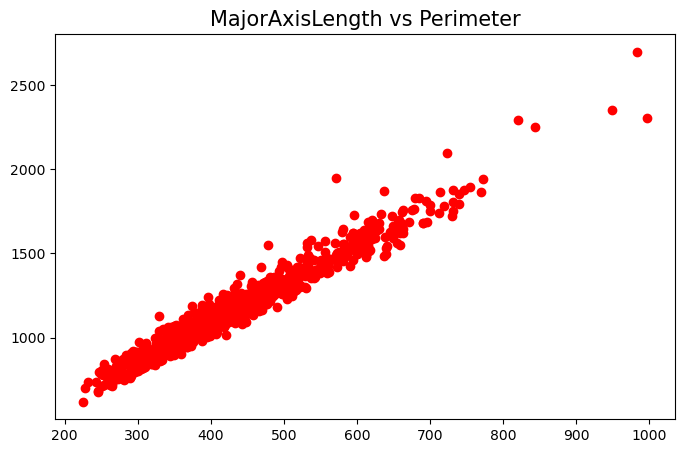

In [48]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs Perimeter",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.Perimeter,color='r')
plt.show()

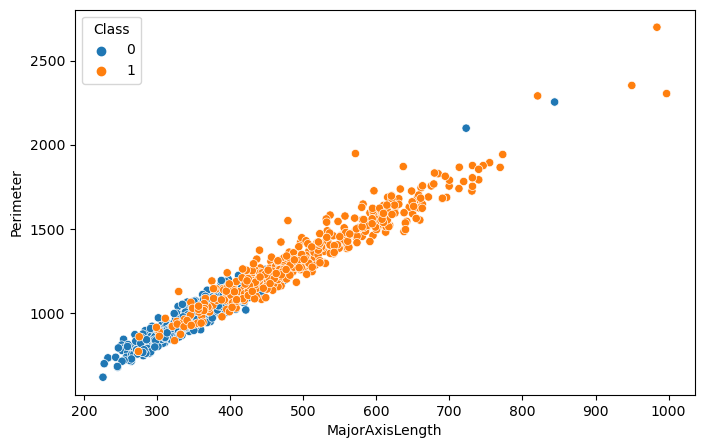

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='MajorAxisLength',
    y='Perimeter',
    hue='Class',
)
plt.show()

**MajorAxis vs ConvexArea** $(0.95)$

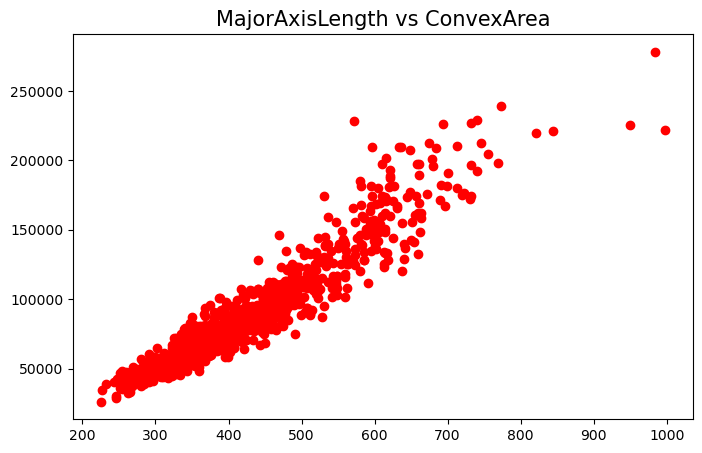

In [50]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.ConvexArea,color='r')
plt.show()

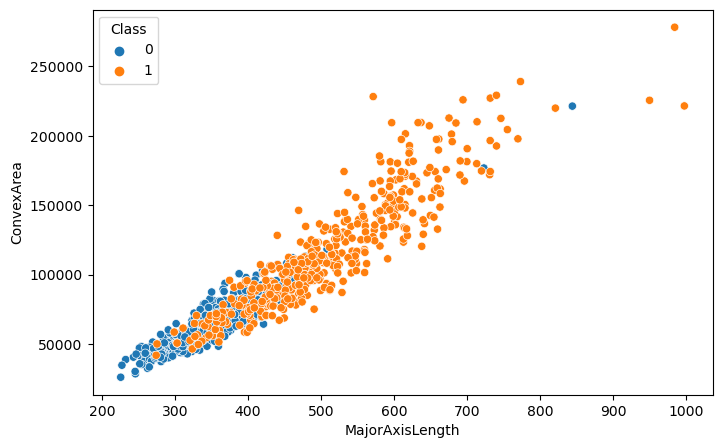

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='MajorAxisLength',
    y='ConvexArea',
    hue='Class',
)
plt.show()

**MajorAxis vs MinorAxis** $(0.73)$

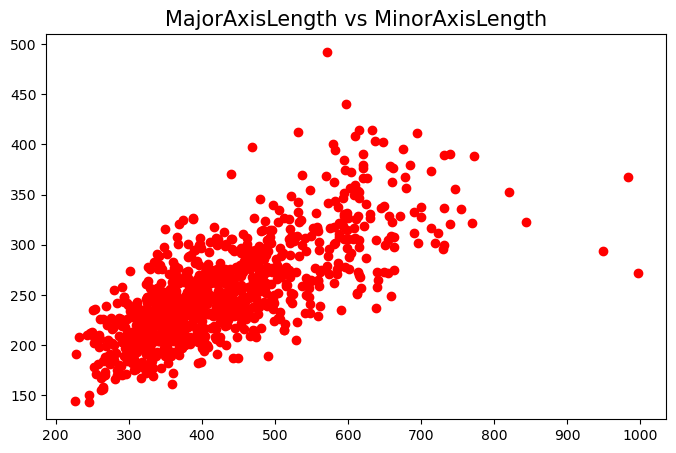

In [52]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs MinorAxisLength",fontsize=15)
plt.scatter(dataset.MajorAxisLength, dataset.MinorAxisLength,color='r')
plt.show()

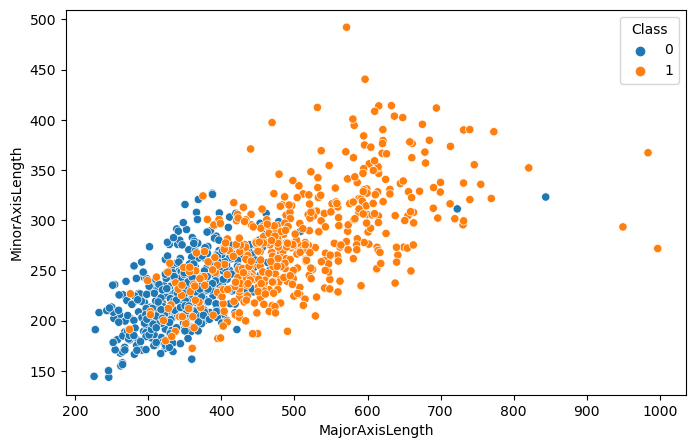

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='MajorAxisLength',
    y='MinorAxisLength',
    hue='Class',
)
plt.show()

**MinorAxisLength vs Perimeter** $(0.83)$

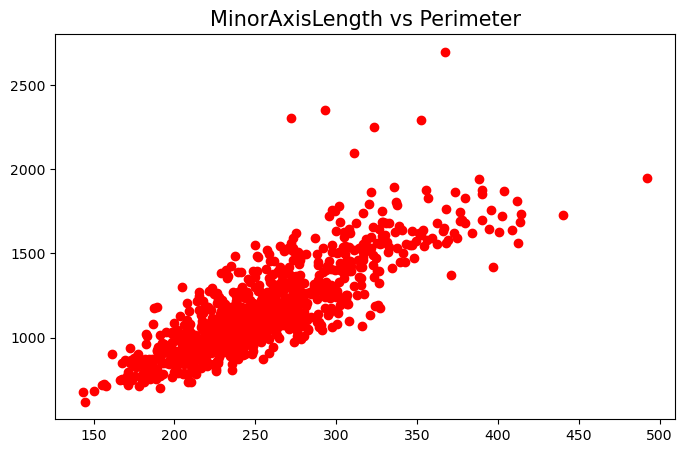

In [54]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs Perimeter",fontsize=15)
plt.scatter(dataset.MinorAxisLength, dataset.Perimeter,color='r')
plt.show()

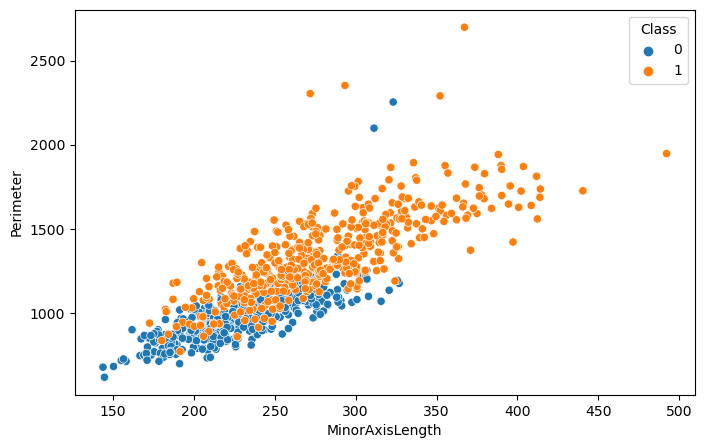

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='MinorAxisLength',
    y='Perimeter',
    hue='Class',
)
plt.show()

**MinorAxisLength vs ConvexArea** $(0.9)$

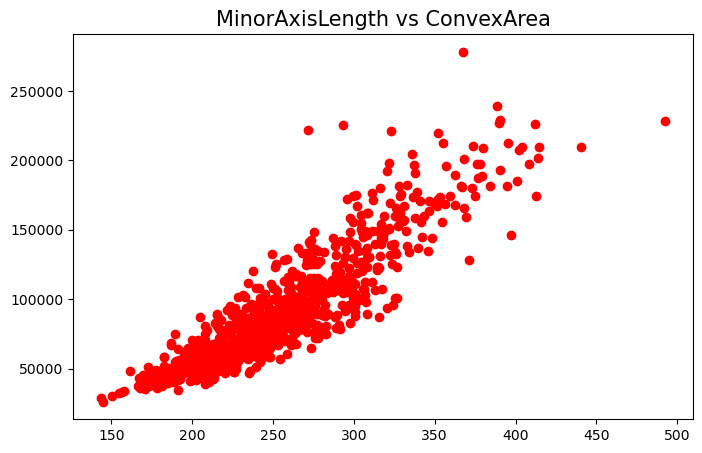

In [56]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(dataset.MinorAxisLength, dataset.ConvexArea,color='r')
plt.show()

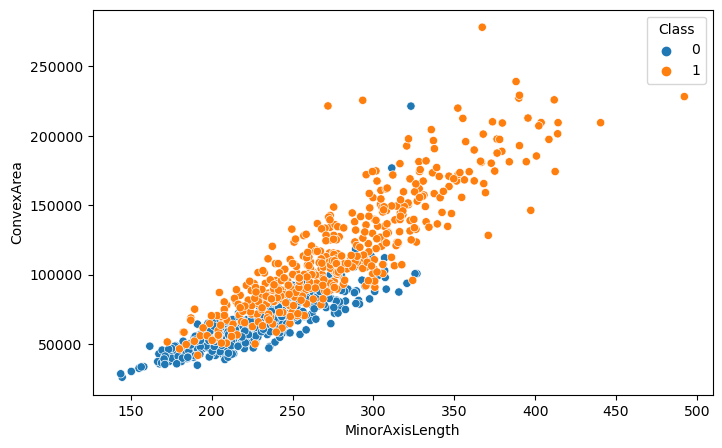

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='MinorAxisLength',
    y='ConvexArea',
    hue='Class',
)
plt.show()

**ConvexArea vs Perimeter** $(0.98)$

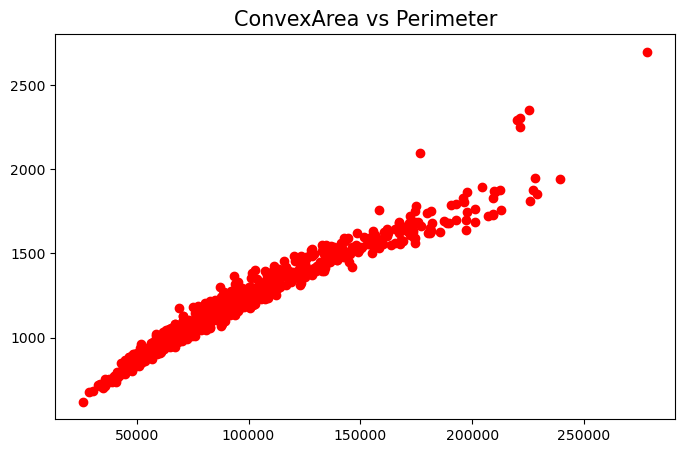

In [58]:
plt.figure(figsize=(8,5))
plt.title("ConvexArea vs Perimeter",fontsize=15)
plt.scatter(dataset.ConvexArea, dataset.Perimeter,color='r')
plt.show()

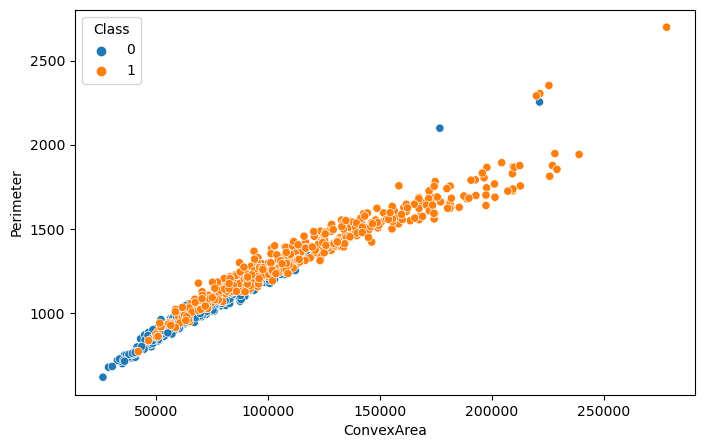

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=dataset,
    x='ConvexArea',
    y='Perimeter',
    hue='Class',
)
plt.show()

All other relation were less that 70% and the negative relations weren't that strong to be worth to be visualized.

### Feature Selection

#### The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

In [60]:
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

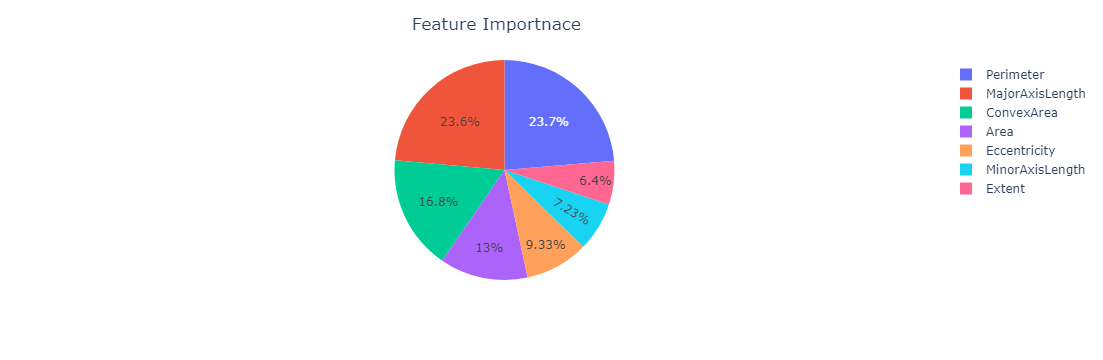

In [61]:
feature_imps = []
for i in range(10):  # This is done to get a more Robust result about the Feature Importnaces
    feature_selector = RandomForestClassifier()
    feature_selector.fit(X_data,y_data)
    feature_imps.append(feature_selector.feature_importances_)
feature_imps = np.mean(np.array(feature_imps),axis=0)

fig = px.pie(
    names=dataset.columns[:-1],
    values=feature_imps,
    width=500
)
fig.update_layout({'title':{'text':'Feature Importnace','x':0.45}})
fig.show()

#### If you look at the Box & Histogram Plot of Extent (feature), you will get why it has the Lowest Feature Importnace

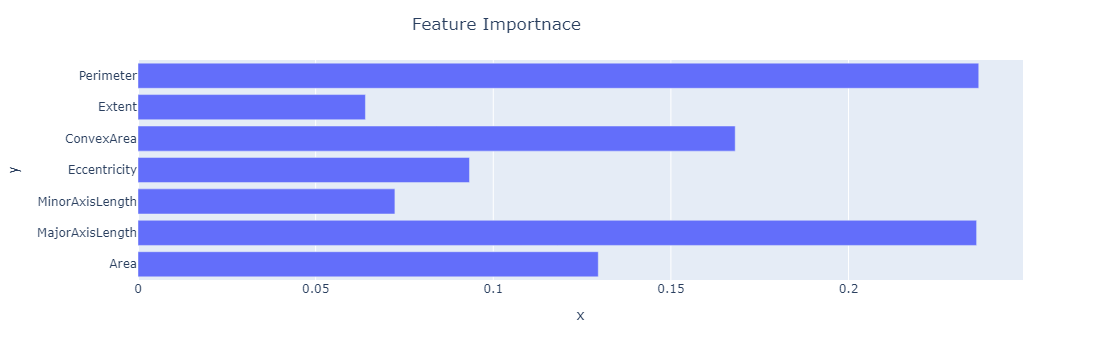

In [62]:
fig = px.bar(
    y=dataset.columns[:-1],
    x=feature_imps,
)
fig.update_layout({'title':{'text':'Feature Importnace','x':0.45}})
fig.show()

The percentage is still high that's why I am not discarding it.

### Data Scaling :

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
dataset['MinorAxisLength'] = mms.fit_transform(dataset[['MinorAxisLength']])
dataset['Eccentricity'] = mms.fit_transform(dataset[['Eccentricity']])
dataset['Perimeter'] = mms.fit_transform(dataset[['Perimeter']])

# Standardization
dataset['Area'] = ss.fit_transform(dataset[['Area']])
dataset['MajorAxisLength'] = ss.fit_transform(dataset[['MajorAxisLength']])
dataset['ConvexArea'] = ss.fit_transform(dataset[['ConvexArea']])
dataset['Extent'] = ss.fit_transform(dataset[['Extent']])
dataset.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577         0.314376      0.767872   -0.015709   
1 -0.324217        -0.209012         0.284945      0.738636   -0.304248   
2  0.078292         0.097758         0.351778      0.733009    0.062113   
3 -1.074286        -1.245051         0.186620      0.548194   -1.076165   
4 -0.215393        -0.678958         0.422064      0.350968   -0.238623   

     Extent  Perimeter  Class  
0  1.106743   0.271791      0  
1 -0.287777   0.241842      0  
2 -1.158250   0.283594      0  
3  0.001711   0.108284      0  
4  1.745259   0.218493      0

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

### Models

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2)

### RandomForest

#### A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

### Notes

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [66]:
rfc2 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,
                             min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                             max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None,random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [67]:
rfc2.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
rfc2.base_estimator

'deprecated'

In [69]:
rfc2.classes_

array([0, 1], dtype=int64)

In [70]:
rfc2.n_classes_

2

In [71]:
rfc2.feature_importances_

array([0.13774657, 0.24004487, 0.07970554, 0.09462227, 0.15053462,
       0.06720542, 0.23014071])

In [72]:
y_pred_test = rfc2.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, y_pred_test)

0.8722222222222222

### Hyperparameter tuning using RandomizedSearch CV

Feel free to experiment with the parameters yourself

In [75]:
n_estimators = [5,10,15,20,25,30,35,40,45,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt','log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(20, 150, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] # minimum sample number to split a node
min_samples_leaf = [1, 3, 5, 7, 9] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
oob_score = [True, False] # for oob to consider or not

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [76]:
rfc_hyp = RandomForestClassifier()

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
rf_random = RandomizedSearchCV(estimator = rfc_hyp,param_distributions = random_grid,
               n_iter = 100, cv = 20, verbose=2, random_state=35, n_jobs = -1)

In [79]:
rf_random.fit(X_train, y_train)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 31, 43, 55, 67, 79,
                                                      90, 102, 114, 126, 138,
                                                      150],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 100]},
                   random_state=35, verbose=2)

### Print the best parameters

In [80]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 31, 43, 55, 67, 79, 90, 102, 114, 126, 138, 150], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 3, 5, 7, 9], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 67, 'bootstrap': True}  



### Using the best parameters

In [81]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 1, max_features = 'auto', max_depth= 55, bootstrap=True)
randmf.fit( X_train, y_train)

C:\Users\sari3003\AppData\Local\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_depth=55, max_features='auto', min_samples_split=6)

In [82]:
y_pred_test = randmf.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred_test)

0.8777777777777778

In [84]:
import joblib

In [85]:
joblib.dump(randmf, 'raisin_model.pkl')

['raisin_model.pkl']

In [86]:
print("Model saved as raisin_model.pkl")

Model saved as raisin_model.pkl
